In [31]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
pd.set_option("display.max_rows", 10)

In [32]:
def standardize_figure(fig):
    fig.update_layout(font_size = 20,
                      margin=dict(l=50, r=50, b=0, t=1))

## Video 1: Intro to Classification

In [33]:
df = pd.read_csv("data/pay_status.csv")
df.head(5)

,Income,Debt,Status
0,6552.53,1170.93,Did Not Pay
1,7247.80,570.94,Did Not Pay
2,8074.38,422.67,Did Not Pay
3,5776.60,872.42,Did Not Pay
4,6297.35,887.56,Did Not Pay


In [34]:
df["Status"].value_counts()

Status
Paid           125
Did Not Pay    100
Name: count, dtype: int64

<Axes: xlabel='Income', ylabel='Debt'>

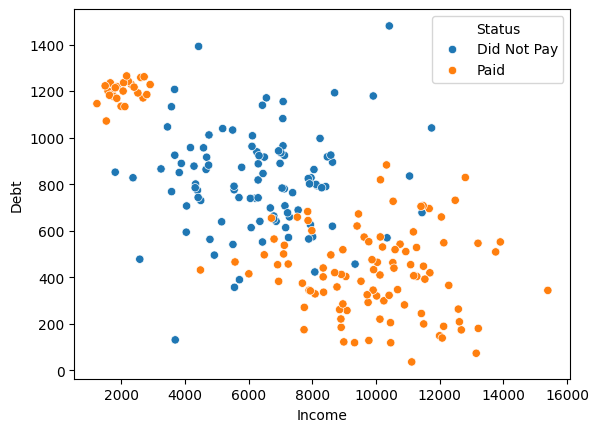

In [35]:
sns.scatterplot(data = df, x='Income', y='Debt', hue='Status')

## Video 2: Nearest Neighbors in sklearn

In [36]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors = 5)

In [37]:
model.fit(df[['Income', 'Debt']], df['Status'])

KNeighborsClassifier()

In [38]:
model.predict([[13000, 400]])

c:\Users\sspillane\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning:

X does not have valid feature names, but KNeighborsClassifier was fitted with feature names



array(['Paid'], dtype=object)

In [39]:
model.predict([[2000, 1200]])

c:\Users\sspillane\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning:

X does not have valid feature names, but KNeighborsClassifier was fitted with feature names



array(['Paid'], dtype=object)

In [40]:
def plot_decision_boundary(model, x, y):
    """This function plots the given two class model's decision boundaries over the x and y values provided"""
    sns_cmap = ListedColormap(np.array(sns.color_palette())[0:2, :])

    xx, yy = np.meshgrid(x, y)

    Z_string = model.predict(np.c_[xx.ravel(), yy.ravel()])
    categories, Z_int = np.unique(Z_string, return_inverse=True)
    Z_int = Z_int 
    Z_int = Z_int.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z_int, cmap=sns_cmap)

c:\Users\sspillane\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning:

X does not have valid feature names, but KNeighborsClassifier was fitted with feature names



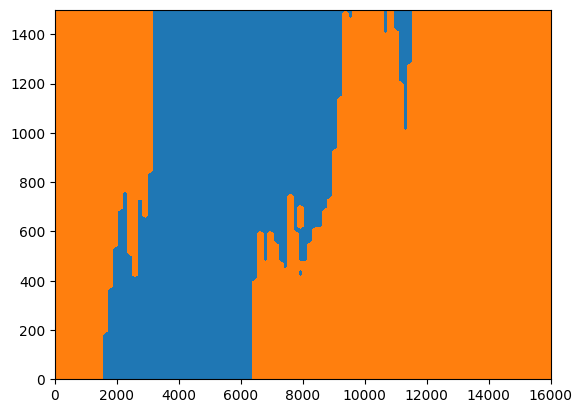

In [41]:
x_range = np.linspace(0, 16000, 100)
y_range = np.linspace(0, 1500, 100)
plot_decision_boundary(model, x_range, y_range)

## k Nearest Neighbors

In [42]:
# feel free to adjust n_neighbors to see how the model changes
model = KNeighborsClassifier(n_neighbors = 200)
model.fit(df[['Income', 'Debt']], df['Status'])

KNeighborsClassifier(n_neighbors=200)

c:\Users\sspillane\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning:

X does not have valid feature names, but KNeighborsClassifier was fitted with feature names



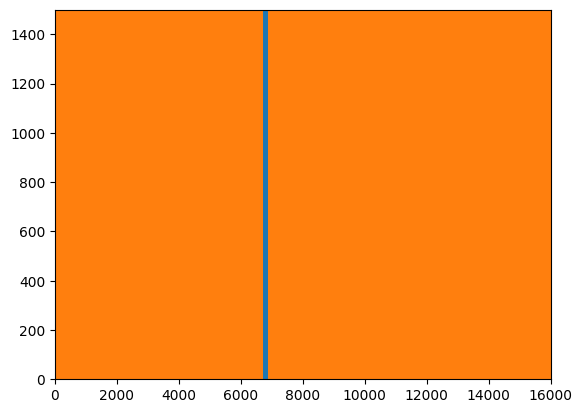

In [43]:
x_range = np.linspace(0, 16000, 100)
y_range = np.linspace(0, 1500, 100)
plot_decision_boundary(model, x_range, y_range)

In [44]:
df["y_hat"] = model.predict(df[["Income", "Debt"]])

In [45]:
df.iloc[0:5]

,Income,Debt,Status,y_hat
0,6552.53,1170.93,Did Not Pay,Paid
1,7247.80,570.94,Did Not Pay,Paid
2,8074.38,422.67,Did Not Pay,Paid
3,5776.60,872.42,Did Not Pay,Paid
4,6297.35,887.56,Did Not Pay,Paid


In [46]:
from sklearn.metrics import accuracy_score

def get_misclassification_rate_for_k(k):
    model = KNeighborsClassifier(n_neighbors = k)
    model.fit(df[['Income', 'Debt']], df['Status'])
    return 1 - accuracy_score(model.predict(df[['Income', 'Debt']]), df["Status"])

In [47]:
ks = range(1, len(df))
errors = [get_misclassification_rate_for_k(k) for k in ks]
errors_and_ks = pd.DataFrame({'k': ks, 'Misclassification Rate': errors})

In [48]:
errors_and_ks

,k,Misclassification Rate
0,1,0.000000
1,2,0.062222
2,3,0.084444
3,4,0.075556
4,5,0.093333
...,...,...
219,220,0.444444
220,221,0.444444
221,222,0.444444
222,223,0.444444


In [49]:
errors_and_ks["-k"] = -errors_and_ks["k"]

In [50]:
import plotly.express as px
fig = px.line(errors_and_ks, x = "k", y = "Misclassification Rate")
standardize_figure(fig)
fig.write_image("misclassification_rate_vs_k.png", scale = 2)

In [51]:
import plotly.express as px
fig = px.line(errors_and_ks, x = "-k", y = "Misclassification Rate")
standardize_figure(fig)
fig.show()
fig.write_image("misclassification_rate_vs_neg_k.png", scale = 2)

# We previously used len(df) instead of 180 in line 2 below
# best practice is to use (1 - 1/cv)len(df), to account for the fact that 1/n of the samples are used as the training set

for below, len(df) = 225, cv=5, num = 225(1-1/5) = 180

In [65]:
num=180
model = KNeighborsClassifier()
parameters_to_try = {'n_neighbors': np.array(range(1, num))}

from sklearn.model_selection import GridSearchCV
model_finder = GridSearchCV(estimator = model, 
                               param_grid = parameters_to_try, 
                               scoring = "accuracy",
                               cv = 5)

In [66]:
model_finder.fit(df[['Income', 'Debt']], df["Status"])

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92...7,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
       144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
       157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
       170, 171, 172, 173, 174, 175, 176, 177, 178, 179])},
             scoring='accuracy')

In [67]:
model_finder.best_estimator_

KNeighborsClassifier(n_neighbors=3)

In [68]:
model_finder.cv_results_['mean_test_score']

array([0.74666667, 0.75111111, 0.77333333, 0.76888889, 0.76444444,
       0.76888889, 0.76444444, 0.76      , 0.76      , 0.76      ,
       0.76      , 0.75555556, 0.76      , 0.76      , 0.76      ,
       0.75555556, 0.76888889, 0.74666667, 0.75555556, 0.74666667,
       0.73777778, 0.74666667, 0.75111111, 0.74666667, 0.75111111,
       0.74222222, 0.74222222, 0.74222222, 0.74222222, 0.73777778,
       0.72888889, 0.73333333, 0.72444444, 0.72      , 0.71555556,
       0.71555556, 0.72      , 0.72      , 0.72      , 0.71555556,
       0.71555556, 0.71555556, 0.71555556, 0.72      , 0.72      ,
       0.72444444, 0.72      , 0.72444444, 0.72444444, 0.72444444,
       0.72444444, 0.73777778, 0.73777778, 0.73777778, 0.73777778,
       0.73333333, 0.73777778, 0.72888889, 0.73777778, 0.73777778,
       0.73333333, 0.72888889, 0.73333333, 0.73333333, 0.73333333,
       0.72888889, 0.73333333, 0.73333333, 0.73333333, 0.73333333,
       0.73333333, 0.73333333, 0.73333333, 0.73333333, 0.73333

In [69]:
len(df)

225

In [70]:
gridsearch_output = pd.DataFrame({'CV accuracy': model_finder.cv_results_['mean_test_score'],
             'k': np.array(range(1, num))})

In [71]:
fig = px.line(gridsearch_output, x = "k", y = "CV accuracy")
standardize_figure(fig)
fig.show()
fig.write_image("cv_accuracy_vs_k.png")

In [72]:
gridsearch_output["-k"] = -gridsearch_output["k"]
gridsearch_output["CV Error"] = 1 - gridsearch_output["CV accuracy"]

In [73]:
fig = px.line(gridsearch_output, x = "-k", y = "CV Error")
standardize_figure(fig)
fig.show()
fig.write_image("cv_error_vs_minus_k.png")

In [31]:
gridsearch_output

,CV accuracy,k,-k,CV Error
0,0.746667,1,-1,0.253333
1,0.751111,2,-2,0.248889
2,0.773333,3,-3,0.226667
3,0.768889,4,-4,0.231111
4,0.764444,5,-5,0.235556
...,...,...,...,...
219,NaN,220,-220,NaN
220,NaN,221,-221,NaN
221,NaN,222,-222,NaN
222,NaN,223,-223,NaN


In [32]:
both_training_and_CV_errors = pd.merge(errors_and_ks.rename(columns = {"Misclassification Rate": "Training Error"}),
         gridsearch_output,
         left_on = "-k",
         right_on = "-k",
         how = "inner")
both_training_and_CV_errors

,k_x,Training Error,-k,CV accuracy,k_y,CV Error
0,1,0.000000,-1,0.746667,1,0.253333
1,2,0.062222,-2,0.751111,2,0.248889
2,3,0.084444,-3,0.773333,3,0.226667
3,4,0.075556,-4,0.768889,4,0.231111
4,5,0.093333,-5,0.764444,5,0.235556
...,...,...,...,...,...,...
219,220,0.444444,-220,NaN,220,NaN
220,221,0.444444,-221,NaN,221,NaN
221,222,0.444444,-222,NaN,222,NaN
222,223,0.444444,-223,NaN,223,NaN


In [33]:
both_training_and_CV_errors["CV Error"]

0      0.253333
1      0.248889
2      0.226667
3      0.231111
4      0.235556
         ...   
219         NaN
220         NaN
221         NaN
222         NaN
223         NaN
Name: CV Error, Length: 224, dtype: float64

In [34]:
fig = px.line(both_training_and_CV_errors, x = "-k", y = ["Training Error", "CV Error"])
standardize_figure(fig)
fig.update_layout(legend_title= "",
              legend=dict(
                x=0.05,
                y=0.05,
                bordercolor="Black",
               borderwidth=2))
fig.show()
fig.write_image("Training_and_CV_error_vs_minus_k.png")

In [35]:
fig = px.line(both_training_and_CV_errors.iloc[0:40], x = "-k", y = ["Training Error", "CV Error"])
standardize_figure(fig)
fig.update_layout(legend_title= "",
              legend=dict(
                x=0.05,
                y=0.05,
                bordercolor="Black",
               borderwidth=2))
fig.show()
fig.write_image("Training_and_CV_error_vs_minus_k_small_k_only.png")

### predict_proba

In [36]:
#np.random.seed(201)

In [37]:
model = KNeighborsClassifier(n_neighbors = 10)
model.fit(df[['Income', 'Debt']], df['Status'])

KNeighborsClassifier(n_neighbors=10)

In [38]:
ten_random_rows = df[["Income", "Debt"]].iloc[[217, 70, 146, 211, 71, 23, 179, 163, 144, 157]]
ten_random_rows

,Income,Debt
217,2052.38,1200.14
70,5536.69,791.12
146,8349.86,335.78
211,2216.65,1242.31
71,2575.43,477.58
23,7275.85,659.38
179,7093.72,500.13
163,11278.11,403.40
144,6711.90,654.25
157,11084.64,454.15


In [39]:
pd.DataFrame(model.predict(ten_random_rows[["Income", "Debt"]]),
             columns = ["prediction"])

,prediction
0,Paid
1,Did Not Pay
2,Paid
3,Paid
4,Paid
5,Did Not Pay
6,Did Not Pay
7,Paid
8,Did Not Pay
9,Paid


In [40]:
model.predict_proba(ten_random_rows[["Income", "Debt"]])

array([[0. , 1. ],
       [0.9, 0.1],
       [0.3, 0.7],
       [0. , 1. ],
       [0.3, 0.7],
       [0.7, 0.3],
       [0.5, 0.5],
       [0. , 1. ],
       [0.6, 0.4],
       [0.1, 0.9]])

In [41]:
pd.DataFrame(["Paid" if x else "Did Not Pay" for x in model.predict_proba(ten_random_rows[["Income", "Debt"]])[:, 1] >= 0.9],
             columns = ["prediction"])

,prediction
0,Paid
1,Did Not Pay
2,Did Not Pay
3,Paid
4,Did Not Pay
5,Did Not Pay
6,Did Not Pay
7,Paid
8,Did Not Pay
9,Paid


# Confusion Matrix, Recall and Precision

In [82]:
import numpy as np
from sklearn.metrics import precision_recall_curve
y_true = np.array([0, 0, 1, 1])
y_scores = np.array([0.1, 0.4, 0.35, 0.8])
precision, recall, thresholds = precision_recall_curve(y_true, y_scores)
print(precision)
print(recall)
print(thresholds)


[0.5        0.66666667 0.5        1.         1.        ]
[1.  1.  0.5 0.5 0. ]
[0.1  0.35 0.4  0.8 ]


In [74]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
def show_confusion_matrix_and_print_accuracy_and_recall(reality, predictions):
    cm = confusion_matrix(reality, predictions)
    sns.heatmap(cm, annot=True, fmt = "d", cmap = "Blues", annot_kws={"size": 20}, cbar = False)
    plt.ylabel('True')
    plt.xlabel('Predicted')
    sns.set(font_scale = 2)
    print(f"Precision: {precision_score(reality, predictions)}")
    print(f"Recall: {recall_score(reality, predictions)}")    

In [75]:
def predict_with_threshold(probabilities, T):
    p1 = probabilities[:, 1]
    return 1 * (p1 > T)

In [76]:
model = KNeighborsClassifier(n_neighbors = 30)
model.fit(df[['Income', 'Debt']], df['Status'])

KNeighborsClassifier(n_neighbors=30)

In [77]:
yhat_probabilities = model.predict_proba(df[['Income', 'Debt']])

In [78]:
df["Status_number"] = (df["Status"] == "Paid") * 1

Precision: 0.7011494252873564
Recall: 0.976


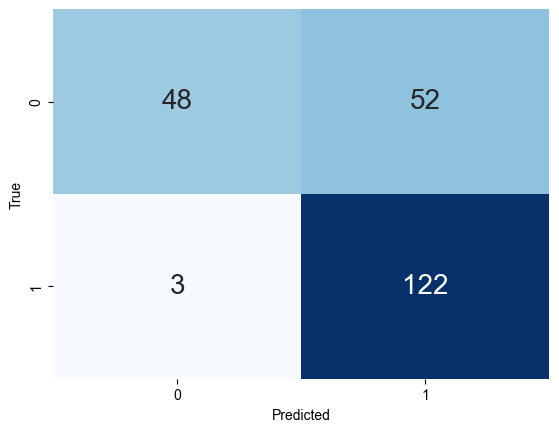

In [79]:
show_confusion_matrix_and_print_accuracy_and_recall(df["Status_number"], predict_with_threshold(yhat_probabilities, 0.2))

Precision: 0.8560606060606061
Recall: 0.904


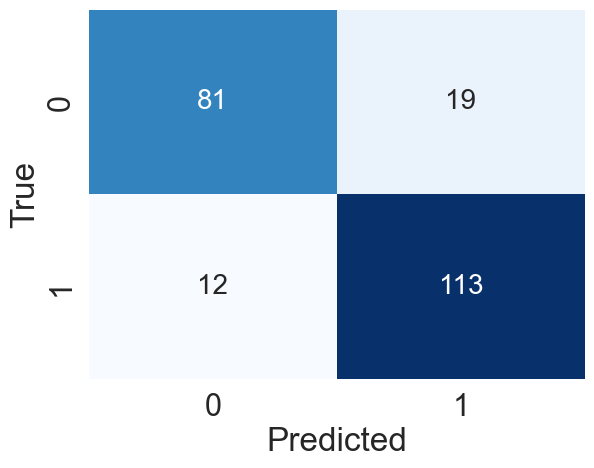

In [80]:
show_confusion_matrix_and_print_accuracy_and_recall(df["Status_number"], predict_with_threshold(yhat_probabilities, 0.4))

Precision: 0.908256880733945
Recall: 0.792


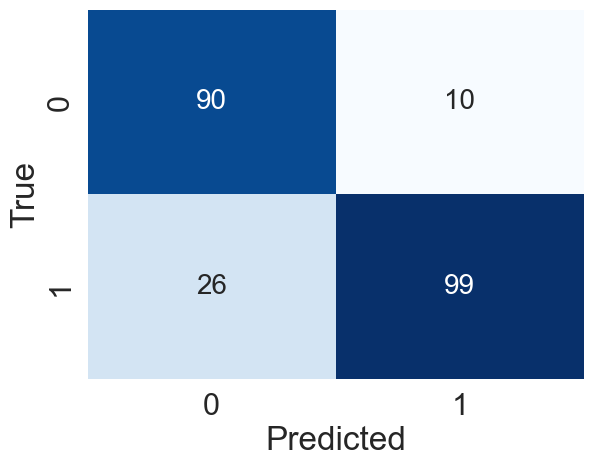

In [49]:
show_confusion_matrix_and_print_accuracy_and_recall(df["Status_number"], predict_with_threshold(yhat_probabilities, 0.6))

Precision: 0.9042553191489362
Recall: 0.68


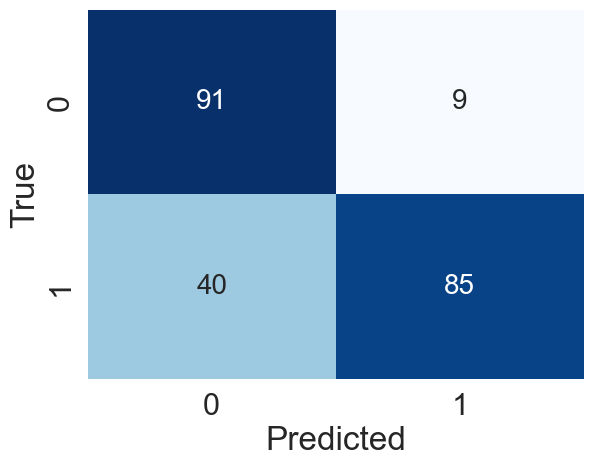

In [50]:
show_confusion_matrix_and_print_accuracy_and_recall(df["Status_number"], predict_with_threshold(yhat_probabilities, 0.8))

In [51]:
from sklearn.metrics import precision_recall_curve

#model = KNeighborsClassifier(n_neighbors = 30)
#model.fit(df[['Income', 'Debt']], df['Status'])
#yhat_probabilities = model.predict_proba(df[['Income', 'Debt']])
#df["Status_number"] = (df["Status"] == "Paid") * 1
precision, recall, thresholds = precision_recall_curve(df["Status"], yhat_probabilities[:, 1], 
                                                       pos_label = "Paid")

precision_recall_data = pd.DataFrame({"precision" : precision[:-1], "recall": recall[:-1], "T": thresholds})
px.line(precision_recall_data, y = "precision", x = "recall", hover_name = "T", markers = True)
#plt.plot(recall, precision, '*')
#plt.xlabel("recall")
#plt.ylabel("precision")
#plt.text(recall[467], precision[467], f"T = {thresholds[467]:.2f}")
#plt.text(recall[400], precision[400], f"T = {thresholds[400]:.2f}")
#plt.text(recall[540], precision[540], f"T = {thresholds[540]:.2f}")
#plt.ylim(-0.03, 1.05)
#plt.savefig("precision_vs_recall_lm_better.png", dpi = 300, bbox_inches = "tight")
#https://scikit-learn.org/stable/auto_examples/model_selection/plot_precision_recall.html#sphx-glr-auto-examples-model-selection-plot-precision-recall-py

In [52]:
class RandomGuesser():
    def predict(self, x):
        return np.random.random(len(x))
        
rg = RandomGuesser()  
rg.predict(df[["Income", "Debt"]])

array([0.25459944, 0.10767415, 0.11552138, 0.15976204, 0.46127803,
       0.51791404, 0.22198991, 0.94716104, 0.81607517, 0.60139727,
       0.01671893, 0.2722268 , 0.05849283, 0.93248836, 0.82320467,
       0.11881082, 0.05916704, 0.14251921, 0.81240324, 0.04348089,
       0.75007378, 0.48773892, 0.05162638, 0.98725266, 0.305941  ,
       0.01175385, 0.66125457, 0.55759048, 0.01446196, 0.813328  ,
       0.38806896, 0.07377298, 0.98844835, 0.78929007, 0.60627602,
       0.21489938, 0.78655308, 0.51880174, 0.72149674, 0.83586432,
       0.85480259, 0.291553  , 0.54954543, 0.0806396 , 0.50561439,
       0.12196337, 0.21303109, 0.34042183, 0.31483775, 0.90914997,
       0.33779911, 0.95883035, 0.77906869, 0.96689029, 0.72005303,
       0.11081767, 0.99327638, 0.78611324, 0.94330942, 0.28670066,
       0.43978594, 0.19259369, 0.65800703, 0.03090564, 0.3244152 ,
       0.80327377, 0.71376532, 0.56261963, 0.91555484, 0.373871  ,
       0.59328341, 0.39017994, 0.72805071, 0.18254511, 0.34584

In [53]:
precision, recall, thresholds = precision_recall_curve(df["Status"], rg.predict(df[["Income", "Debt"]]), 
                                                       pos_label = "Paid")

precision_recall_data = pd.DataFrame({"precision" : precision[:-1], "recall": recall[:-1], "T": thresholds})
px.line(precision_recall_data, y = "precision", x = "recall", hover_name = "T", markers = True)

# Nearest Neighbors for Regression

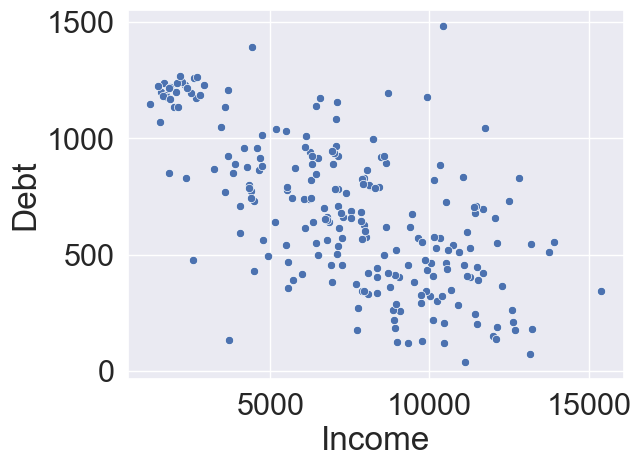

In [54]:
sns.scatterplot(data=df, x="Income", y="Debt")
fig = plt.gcf()
fig.savefig("debt_vs_income.png", dpi=300, bbox_inches = "tight")

In [55]:
from sklearn.neighbors import KNeighborsRegressor
rmodel = KNeighborsRegressor(n_neighbors = 1)
rmodel.fit(df[["Income"]], df["Debt"])
rmodel.predict([[15800]])

/Users/hug/miniconda3/envs/ds/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning:

X does not have valid feature names, but KNeighborsRegressor was fitted with feature names



array([343.56])

/Users/hug/miniconda3/envs/ds/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning:

X does not have valid feature names, but KNeighborsRegressor was fitted with feature names



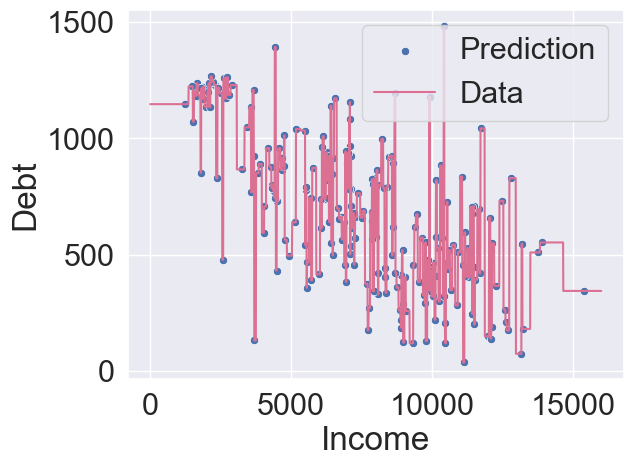

In [56]:
income_values = np.linspace(0, 16000, 2000)
sns.scatterplot(data=df, x="Income", y="Debt")
sns.lineplot(x = income_values, y = rmodel.predict(income_values.reshape(-1, 1)), color="palevioletred")
plt.legend(['Prediction', 'Data'])
fig = plt.gcf()
fig.savefig("debt_vs_income_prediction_k1.png", dpi=300, bbox_inches = "tight")

/Users/hug/miniconda3/envs/ds/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning:

X does not have valid feature names, but KNeighborsRegressor was fitted with feature names



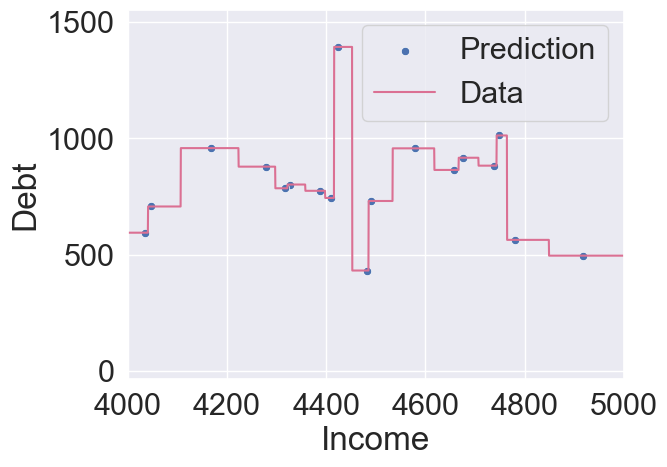

In [57]:
income_values = np.linspace(4000, 5000, 2000)
sns.scatterplot(data=df, x="Income", y="Debt")
sns.lineplot(x = income_values, y = rmodel.predict(income_values.reshape(-1, 1)), color="palevioletred")
plt.gca().set_xlim(4000, 5000)
plt.legend(['Prediction', 'Data'])
fig = plt.gcf()
fig.savefig("debt_vs_income_prediction_k1_zoomed.png", dpi=300, bbox_inches = "tight")

In [58]:
rmodel50 = KNeighborsRegressor(n_neighbors = 50)
rmodel50.fit(df[["Income"]], df["Debt"])

KNeighborsRegressor(n_neighbors=50)

/Users/hug/miniconda3/envs/ds/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning:

X does not have valid feature names, but KNeighborsRegressor was fitted with feature names



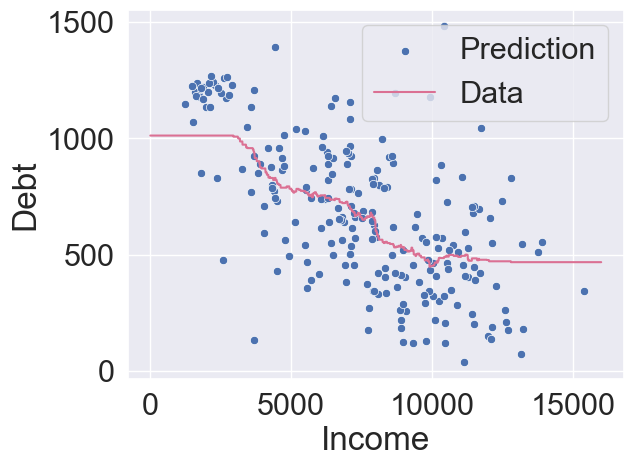

In [60]:
income_values = np.linspace(0, 16000, 2000)
sns.scatterplot(data=df, x="Income", y="Debt")
sns.lineplot(x = income_values, y = rmodel50.predict(income_values.reshape(-1, 1)), color="palevioletred")
plt.legend(['Prediction', 'Data'])
fig = plt.gcf()
fig.savefig("debt_vs_income_prediction_k50.png", dpi=300, bbox_inches = "tight")

/Users/hug/miniconda3/envs/ds/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning:

X does not have valid feature names, but KNeighborsRegressor was fitted with feature names



TypeError: lineplot() takes from 0 to 1 positional arguments but 2 were given

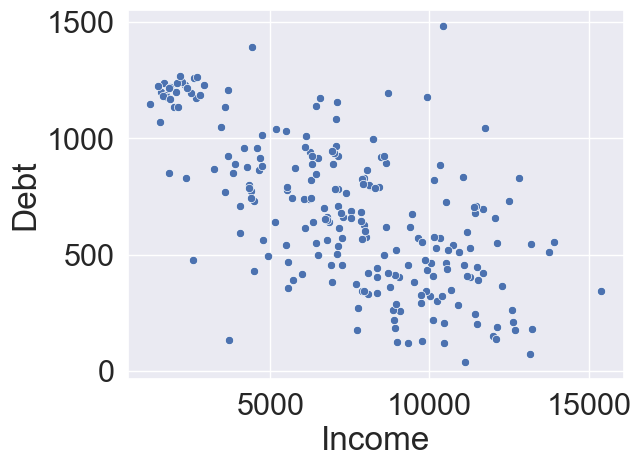

In [61]:
rmodel220 = KNeighborsRegressor(n_neighbors = 220)
rmodel220.fit(df[["Income"]], df["Debt"])
income_values = np.linspace(0, 16000, 2000)
sns.scatterplot(data=df, x="Income", y="Debt")
sns.lineplot(income_values, rmodel220.predict(income_values.reshape(-1, 1)), color="palevioletred")
plt.legend(['Prediction', 'Data'])
fig = plt.gcf()
fig.savefig("debt_vs_income_prediction_k220.png", dpi=300, bbox_inches = "tight")